In [17]:
'''The accuracy of our model on the validation data would peak after training for a number of epochs, and would then start decreasing. In other words, our model would overfit to the training data. Learning how to deal with overfitting is important. Although it's often possible to achieve high accuracy on the training set, what we really want is to develop models that generalize well to a testing set (or data they haven't seen before).

The opposite of overfitting is underfitting. Underfitting occurs when there is still room for improvement on the test data. This can happen for a number of reasons: If the model is not powerful enough, is over-regularized, or has simply not been trained long enough. This means the network has not learned the relevant patterns in the training data.

If you train for too long though, the model will start to overfit and learn patterns from the training data that don't generalize to the test data. We need to strike a balance. Understanding how to train for an appropriate number of epochs as we'll explore below is a useful skill.

To prevent overfitting, the best solution is to use more training data. A model trained on more data will naturally generalize better. When that is no longer possible, the next best solution is to use techniques like regularization. These place constraints on the quantity and type of information your model can store. If a network can only afford to memorize a small number of patterns, the optimization process will force it to focus on the most prominent patterns, which have a better chance of generalizing well.

In this notebook, we'll explore two common regularization techniques—weight regularization and dropout—and use them to improve our IMDB movie review classification notebook.
Rather than using an embedding as in the previous notebook, here we will multi-hot encode the sentences. This model will quickly overfit to the training set. It will be used to demonstrate when overfitting occurs, and how to fight it.

Multi-hot-encoding our lists means turning them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence [3, 5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones.'''

"The accuracy of our model on the validation data would peak after training for a number of epochs, and would then start decreasing. In other words, our model would overfit to the training data. Learning how to deal with overfitting is important. Although it's often possible to achieve high accuracy on the training set, what we really want is to develop models that generalize well to a testing set (or data they haven't seen before).\n\nThe opposite of overfitting is underfitting. Underfitting occurs when there is still room for improvement on the test data. This can happen for a number of reasons: If the model is not powerful enough, is over-regularized, or has simply not been trained long enough. This means the network has not learned the relevant patterns in the training data.\n\nIf you train for too long though, the model will start to overfit and learn patterns from the training data that don't generalize to the test data. We need to strike a balance. Understanding how to train for

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [3]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

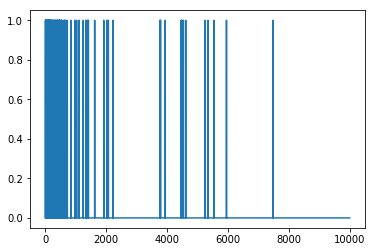

In [4]:
plt.plot(train_data[0])

In [5]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.5163 - acc: 0.8033 - binary_crossentropy: 0.5163 - val_loss: 0.3630 - val_acc: 0.8687 - val_binary_crossentropy: 0.3630
Epoch 2/20
 - 5s - loss: 0.2677 - acc: 0.9054 - binary_crossentropy: 0.2677 - val_loss: 0.2860 - val_acc: 0.8876 - val_binary_crossentropy: 0.2860
Epoch 3/20
 - 5s - loss: 0.1927 - acc: 0.9318 - binary_crossentropy: 0.1927 - val_loss: 0.2848 - val_acc: 0.8861 - val_binary_crossentropy: 0.2848
Epoch 4/20
 - 5s - loss: 0.1532 - acc: 0.9478 - binary_crossentropy: 0.1532 - val_loss: 0.3059 - val_acc: 0.8804 - val_binary_crossentropy: 0.3059
Epoch 5/20
 - 5s - loss: 0.1265 - acc: 0.9574 - binary_crossentropy: 0.1265 - val_loss: 0.3327 - val_acc: 0.8761 - val_binary_crossentropy: 0.3327
Epoch 6/20
 - 5s - loss: 0.1054 - acc: 0.9665 - binary_crossentropy: 0.1054 - val_loss: 0.3621 - val_acc: 0.8720 - val_binary_crossentropy: 0.3621
Epoch 7/20
 - 5s - loss: 0.0883 - acc: 0.9730 - binary_crossentropy:

In [7]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [8]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.6540 - acc: 0.6568 - binary_crossentropy: 0.6540 - val_loss: 0.6134 - val_acc: 0.7310 - val_binary_crossentropy: 0.6134
Epoch 2/20
 - 5s - loss: 0.5694 - acc: 0.7774 - binary_crossentropy: 0.5694 - val_loss: 0.5537 - val_acc: 0.7741 - val_binary_crossentropy: 0.5537
Epoch 3/20
 - 5s - loss: 0.5104 - acc: 0.8342 - binary_crossentropy: 0.5104 - val_loss: 0.5119 - val_acc: 0.8356 - val_binary_crossentropy: 0.5119
Epoch 4/20
 - 5s - loss: 0.4674 - acc: 0.8692 - binary_crossentropy: 0.4674 - val_loss: 0.4823 - val_acc: 0.8536 - val_binary_crossentropy: 0.4823
Epoch 5/20
 - 5s - loss: 0.4341 - acc: 0.8906 - binary_crossentropy: 0.4341 - val_loss: 0.4607 - val_acc: 0.8604 - val_binary_crossentropy: 0.4607
Epoch 6/20
 - 5s - loss: 0.4065 - acc: 0.9065 - binary_crossentropy: 0.4065 - val_loss: 0.4448 - val_acc: 0.8644 - val_binary_crossentropy: 0.4448
Epoch 7/20
 - 6s - loss: 0.3832 - acc: 0.9177 - binary_crossentropy:

In [9]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [10]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 12s - loss: 0.3511 - acc: 0.8481 - binary_crossentropy: 0.3511 - val_loss: 0.3047 - val_acc: 0.8755 - val_binary_crossentropy: 0.3047
Epoch 2/20
 - 11s - loss: 0.1417 - acc: 0.9485 - binary_crossentropy: 0.1417 - val_loss: 0.3576 - val_acc: 0.8640 - val_binary_crossentropy: 0.3576
Epoch 3/20
 - 11s - loss: 0.0494 - acc: 0.9858 - binary_crossentropy: 0.0494 - val_loss: 0.4236 - val_acc: 0.8678 - val_binary_crossentropy: 0.4236
Epoch 4/20
 - 12s - loss: 0.0080 - acc: 0.9988 - binary_crossentropy: 0.0080 - val_loss: 0.5729 - val_acc: 0.8707 - val_binary_crossentropy: 0.5729
Epoch 5/20
 - 11s - loss: 0.0012 - acc: 1.0000 - binary_crossentropy: 0.0012 - val_loss: 0.6656 - val_acc: 0.8713 - val_binary_crossentropy: 0.6656
Epoch 6/20
 - 11s - loss: 2.6661e-04 - acc: 1.0000 - binary_crossentropy: 2.6661e-04 - val_loss: 0.7117 - val_acc: 0.8711 - val_binary_crossentropy: 0.7117
Epoch 7/20
 - 11s - loss: 1.5333e-04 - acc: 1.0000 - b

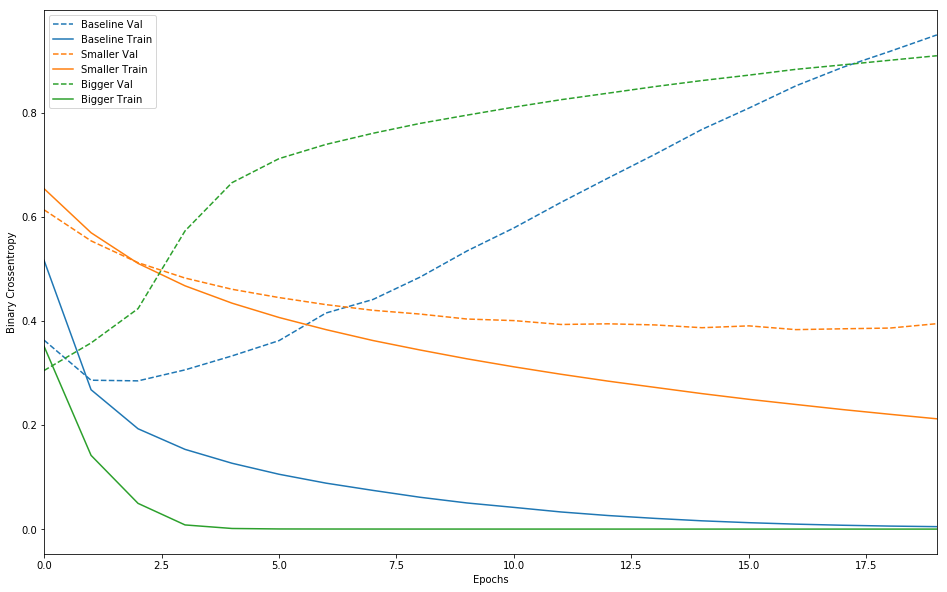

In [11]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [12]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 7s - loss: 0.5145 - acc: 0.8151 - binary_crossentropy: 0.4743 - val_loss: 0.3775 - val_acc: 0.8777 - val_binary_crossentropy: 0.3357
Epoch 2/20
 - 6s - loss: 0.3047 - acc: 0.9092 - binary_crossentropy: 0.2592 - val_loss: 0.3340 - val_acc: 0.8880 - val_binary_crossentropy: 0.2858
Epoch 3/20
 - 6s - loss: 0.2563 - acc: 0.9278 - binary_crossentropy: 0.2060 - val_loss: 0.3346 - val_acc: 0.8863 - val_binary_crossentropy: 0.2826
Epoch 4/20
 - 6s - loss: 0.2320 - acc: 0.9388 - binary_crossentropy: 0.1785 - val_loss: 0.3435 - val_acc: 0.8841 - val_binary_crossentropy: 0.2890
Epoch 5/20
 - 6s - loss: 0.2188 - acc: 0.9453 - binary_crossentropy: 0.1628 - val_loss: 0.3563 - val_acc: 0.8802 - val_binary_crossentropy: 0.2994
Epoch 6/20
 - 6s - loss: 0.2063 - acc: 0.9508 - binary_crossentropy: 0.1488 - val_loss: 0.3686 - val_acc: 0.8773 - val_binary_crossentropy: 0.3106
Epoch 7/20
 - 6s - loss: 0.1997 - acc: 0.9526 - binary_crossentropy:

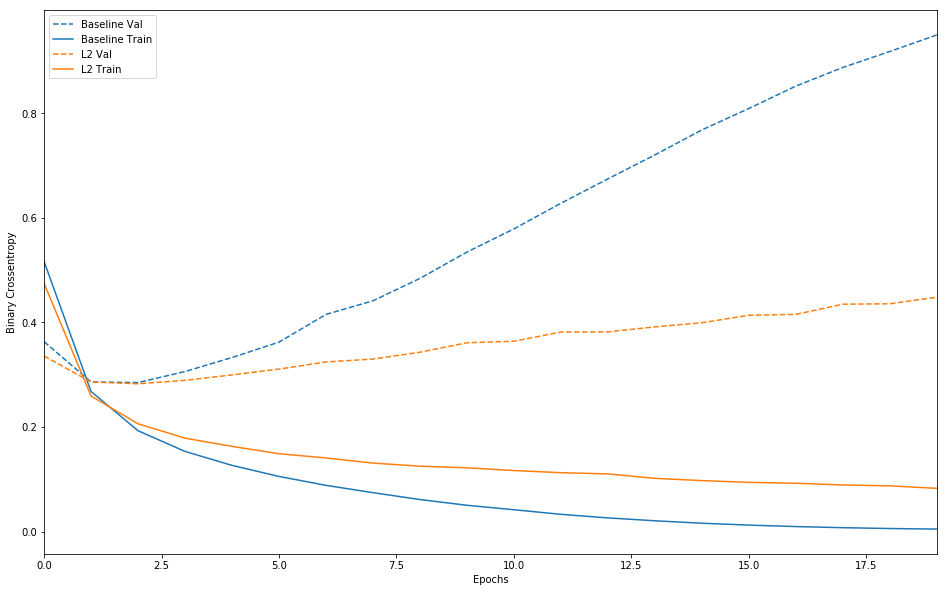

In [13]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [19]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.6173 - acc: 0.6687 - binary_crossentropy: 0.6173 - val_loss: 0.4868 - val_acc: 0.8538 - val_binary_crossentropy: 0.4868
Epoch 2/20
 - 4s - loss: 0.4472 - acc: 0.8210 - binary_crossentropy: 0.4472 - val_loss: 0.3448 - val_acc: 0.8818 - val_binary_crossentropy: 0.3448
Epoch 3/20
 - 4s - loss: 0.3395 - acc: 0.8751 - binary_crossentropy: 0.3395 - val_loss: 0.2872 - val_acc: 0.8888 - val_binary_crossentropy: 0.2872
Epoch 4/20
 - 4s - loss: 0.2748 - acc: 0.9041 - binary_crossentropy: 0.2748 - val_loss: 0.2752 - val_acc: 0.8888 - val_binary_crossentropy: 0.2752
Epoch 5/20
 - 4s - loss: 0.2349 - acc: 0.9216 - binary_crossentropy: 0.2349 - val_loss: 0.2765 - val_acc: 0.8879 - val_binary_crossentropy: 0.2765
Epoch 6/20
 - 4s - loss: 0.2102 - acc: 0.9307 - binary_crossentropy: 0.2102 - val_loss: 0.2860 - val_acc: 0.8852 - val_binary_crossentropy: 0.2860
Epoch 7/20
 - 4s - loss: 0.1753 - acc: 0.9418 - binary_crossentropy:

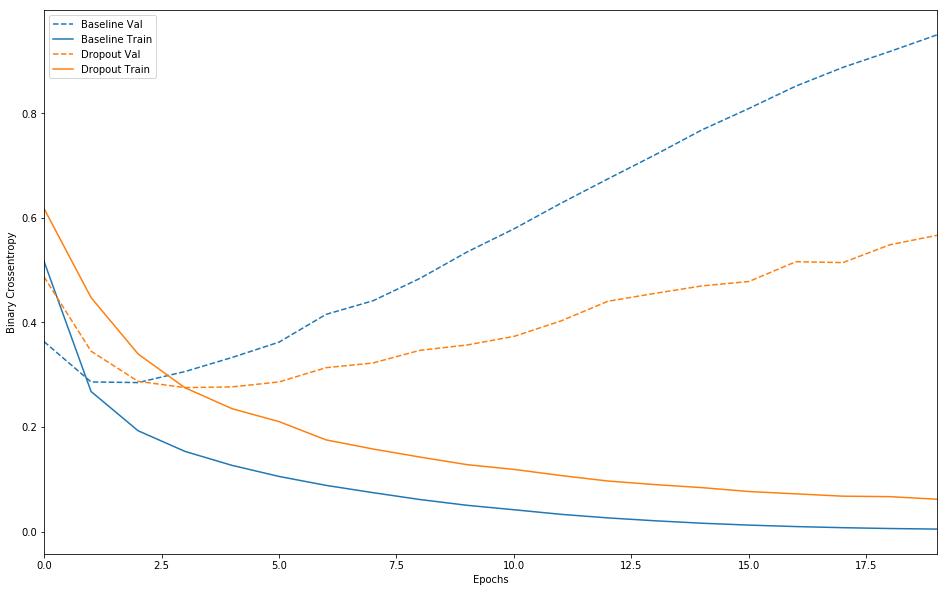

In [20]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])